# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

#### Описание столбцов датафрейма
- `total_images` — количество картинок (фото) в объявлении;
- `last_price` — последняя цена в объявлении;
- `total_area` — общая площадь объекта недвижимости;
- `first_day_exposition` — дата публикации объявления;
- `rooms` — количество комнат у объекта недвижимости;
- `ceiling_height` — высота потолка у объекта недвижимости;
- `floors_total` — количество этажей в здании у объекта недвижимости;
- `living_area` — жилая площадь* объекта недвижимости;
- `floor` — этаж, на котором находится объект недвижимости;
- `is_apartment` — является ли объект недвижимости апартаментами;
- `studio` — является ли объект недвижимости студией;
- `open_plan` — является ли объект недвижимости объектом со свободной планировкой;
- `kitchen_area` — площадь кухни у объекта недвижимости;
- `balcony` — количество балконов у объекта недвижимости;
- `locality_name` — населённый пункт, где располагается объект недвижимости;
- `airports_nearest` — расстояние до ближайшего аэропорта;
- `city_centers_nearest` — расстояние до центра города;
- `parks_around_3000` — количество парков в радиусе 3 км;
- `parks_nearest` — расстояние до ближайшего парка;
- `ponds_around_3000` — количество водоёмов в радиусе 3 км;
- `ponds_nearest` — расстояние до ближайшего водоёма;
- `days_exposition` — количество дней с момента публикации объявления до продажи;

\* *К жилой площади относятся только комнаты — спальни, детские, гостиные. Гардеробные и кладовые — нежилое пространство и в расчетах не учитывается; лестницы и отопительные печи в частных домах относятся к жилым метрам. Кухня, коридор, балкон и ванная тоже не включаются в жилую площадь. Подробнее на РБК: https://realty.rbc.ru/news/61fac0869a79471ad5bea0cb?from=copy*

### Общая информация о файле

In [1]:
#импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression

try:
    df = pd.read_csv('C:/Users/Student/Desktop/real_estate_data.csv', sep='\t')
except:
    df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [2]:
#получим основную информацию о таблице
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [3]:
#количество пропусков
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [4]:
#доля пустых значений
df.isnull().mean()

total_images            0.000000
last_price              0.000000
total_area              0.000000
first_day_exposition    0.000000
rooms                   0.000000
ceiling_height          0.387991
floors_total            0.003629
living_area             0.080299
floor                   0.000000
is_apartment            0.882906
studio                  0.000000
open_plan               0.000000
kitchen_area            0.096122
balcony                 0.486054
locality_name           0.002068
airports_nearest        0.233850
cityCenters_nearest     0.232879
parks_around3000        0.232837
parks_nearest           0.659100
ponds_around3000        0.232837
ponds_nearest           0.615596
days_exposition         0.134225
dtype: float64

In [5]:
#количество явных дубликатов
df.duplicated().sum()

0

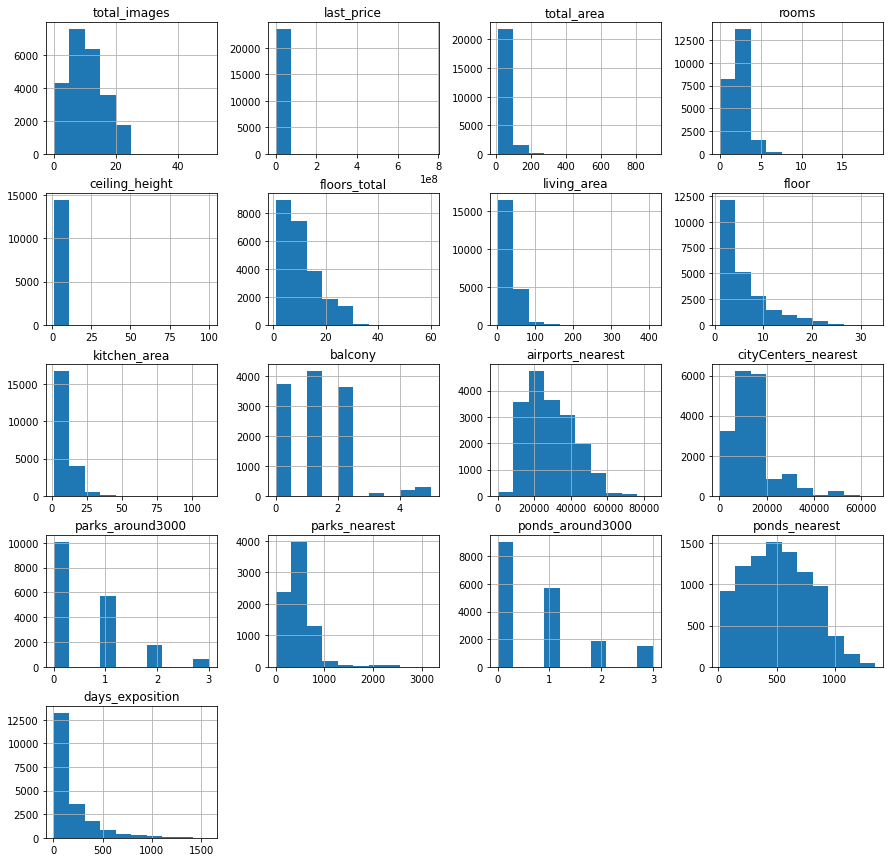

In [6]:
df.hist(figsize=(15, 15));

#### Вывод

Данные представлены в виде таблицы, включающей в себя 23 698 строк и 22 столбца. При этом 3 столбца - с целочисленными данными (тип < int >), 14 столбцов - с числовыми данными типа < float >, 3 столбца типа < object > и 2 столбца с булевым типом (тип < bool >). 

<br/> Есть столбцы с неправильным типом данных:
- floors_total - нужен int64, сейчас float64 (этажей может быть только целое число)
- balcony - нужен int64, сейчас float64 (балконов может быть только целое число)
- parks_around3000 - нужен int64, сейчас float64 (парков может быть только целое число)
- ponds_around3000 - нужен int64, сейчас float64 (водоёмов может быть только целое число)
- is_apartment - должен быть bool, сейчас object (это признак, в котором есть только два состояния - квартира и не квартира)
- first_day_exposition - должен быть datetime, сейчас float64 (это дата публикации)

Есть столбцы с нарушением стилей - cityCenters_nearest, parks_around3000, ponds_around3000 (нужно убрать большие буквы и добавить нижние подчёркивания)

В отдельных столбцах таблицы есть пропуски, но их количество не должно помешать анализу. Возможно, что пользователи не указывают отсутствующие характеристики (напр. если в квартире нет балкона, то пользователь не указывал эту характеристику). Также в городе пользователя может не быть аэропорта, а информация о ближайшем парке может быть неполной по техническим причинам (некоторые общественные пространства в городе могут не быть размечены как парки, хотя фактически являться ими). Кроме того, пропуски могут быть обусловлены техническими ошибками.

Некоторые колонки заставляют усомниться в качестве данных. В квартире не может быть 0 комнат (колонка rooms)

### Предобработка данных

Для некоторых столбцов заполнения медианным значением будет недостаточно, нужно будет заполнение по группам из другого столбца, поэтому напишем функцию для замены значений на медиану, сгруппированную по данным из другого столбца

Для удобства напишем и функцию для заполнения медианой

Там, где не получается заполнить поле чем-либо, заполним поле значением `-1`, чтобы отличать пропуски в данных от фактически нулевых значений (`days_exposition` может быть 0, если объявление было снято в тот же день, а может быть пусто, если объявление ещё активно)

In [7]:
def fillna_with_group_median(df, column_to_fill, grouping_column):
    group_medians = df.groupby(grouping_column)[column_to_fill].transform('median')
    df[column_to_fill] = df[column_to_fill].fillna(group_medians)
    print('Количество NaN в столбце {}:'.format(column_to_fill), df[column_to_fill].isnull().sum())
    return df

def fillna_with_median(df, column_to_fill):
    df[column_to_fill] = df[column_to_fill].fillna(df[column_to_fill].median())
    print('Количество NaN в столбце {}:'.format(column_to_fill), df[column_to_fill].isnull().sum())
    return df

#### Переименуем колонки

In [8]:
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [9]:
#переименование колонок (исправление стиля)
df = df.rename(
    columns={'parks_around3000':'parks_around_3000', 
             'ponds_around3000':'ponds_around_3000', 
             'cityCenters_nearest':'city_centers_nearest'}
)

#проверяем внесение изменений:
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

#### Заполним пропуски в колонках

##### last_price
Заменим значения, которые кажутся нереалистичными (квартиры до 100000 рублей)

In [10]:
df.query("last_price < 100000")

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
8793,7,12190.0,109.0,2019-03-20T00:00:00,2,2.75,25.0,32.0,25,NaN,...,40.5,NaN,Санкт-Петербург,36421.0,9176.0,1.0,805.0,0.0,NaN,8.0


Скорее всего продавец указал цену в десятках тысяч рублей

In [11]:
df.loc[8793, 'last_price'] = 12190000
df.query("last_price < 100000")

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition


##### total_area

In [12]:
df['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

75-й процентиль более чем в 10 раз меньше, чем максимальное значение, что может негативно повлиять на выводы анализа
Это не похоже на технические выбросы, просто это слишком особенные объекты, которые лучше удалить из датафрейма, так как выводы по этому сегменту могут не быть справедливы для остальных объектов

Попробуем отбросить объекты со слишком большой площадью

In [13]:
df['total_area'].quantile([.80, .90, .95, .99, .995])

0.800     75.000
0.900     93.520
0.950    116.000
0.990    197.214
0.995    248.853
Name: total_area, dtype: float64

Отбросив значения выше 99-го процентиля мы можем получить значительный прирост в точности анализа, потеряв при этом 1% данных

In [14]:
df = df.query('total_area <= 190')

Значения кажутся адекватными

##### first_day_exposition
Переведём столбец в формат даты

In [15]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

##### rooms

In [16]:
df['rooms'].describe()

count    23443.000000
mean         2.030841
std          0.988473
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         11.000000
Name: rooms, dtype: float64

In [17]:
df['rooms'].quantile([.80, .90, .95, .99, .995])

0.800    3.0
0.900    3.0
0.950    4.0
0.990    5.0
0.995    5.0
Name: rooms, dtype: float64

In [18]:
df.query(
    'rooms > 5'
)['rooms'].count() / df.shape[0]

0.003241905899415604

Отбросив значения выше 99-го процентиля мы можем получить значительный прирост в точности анализа, потеряв при этом 0,3% данных

In [19]:
df = df.query('rooms <= 5')

Заполним пропуски медианой и в студиях поставим 1 комнату вместо 0

In [20]:
df.query('rooms == 0 and (open_plan == True or studio == True)')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
144,1,2450000.0,27.00,2017-03-30,0,NaN,24.0,15.50,2,NaN,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0
349,4,2320000.0,25.00,2017-09-27,0,NaN,14.0,17.00,1,NaN,...,NaN,0.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.0
440,8,2480000.0,27.11,2018-03-12,0,NaN,17.0,24.75,4,NaN,...,NaN,2.0,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0
508,0,3375000.0,34.40,2017-03-28,0,NaN,26.0,24.30,19,NaN,...,NaN,1.0,посёлок Парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430.0
608,2,1850000.0,25.00,2019-02-20,0,NaN,10.0,NaN,7,NaN,...,NaN,NaN,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23210,7,3200000.0,26.00,2017-09-01,0,NaN,25.0,18.00,16,NaN,...,NaN,0.0,Санкт-Петербург,11405.0,13222.0,0.0,NaN,1.0,623.0,14.0
23442,0,2500000.0,27.70,2017-09-28,0,NaN,24.0,18.00,4,NaN,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,4.0
23554,15,3350000.0,26.00,2018-09-07,0,NaN,19.0,NaN,8,NaN,...,NaN,NaN,Санкт-Петербург,18090.0,17092.0,0.0,NaN,2.0,112.0,31.0
23592,10,1450000.0,29.00,2017-11-11,0,NaN,9.0,18.00,8,NaN,...,NaN,2.0,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,82.0


In [21]:
df.loc[(df['rooms'] == 0) & (df['studio']==True),'rooms'] = 1
df = fillna_with_median(df, 'rooms')

Количество NaN в столбце rooms: 0


##### ceiling_height

In [22]:
#проверим медиану высоты потолков
median = df['ceiling_height'].median()
print('Медианная высота потолков:', median)

Медианная высота потолков: 2.65


Значение адекватно, высота потолков в самой распространённой серии домов в России (1- 447) составляет 2,5 м, что близко к медиане

Поэтому можно использовать медианное значения для заполнения пропусков и выбросов.

In [23]:
#ищем выбросы
df['ceiling_height'].quantile([0.5, 0.9, 0.95, 0.99, 0.995, 0.999])

0.500     2.65
0.900     3.00
0.950     3.20
0.990     3.75
0.995     4.00
0.999    25.00
Name: ceiling_height, dtype: float64

In [24]:
#заполним медианой пропуски и всё, что больше 995-ого процентиля:
q995 = df['ceiling_height'].quantile(0.995)

df['ceiling_height'] = df['ceiling_height'].fillna(median)
df.loc[(df['ceiling_height'] > q995), 'ceiling_height'] = median
df['ceiling_height'].sort_values(ascending=False).head(5)

17196    4.0
18810    4.0
14900    4.0
179      4.0
3758     4.0
Name: ceiling_height, dtype: float64

Потолки ниже 2 метров - это скорее всего ошибки при заполнении объявления. Найдём эти случаи:

In [25]:
df.query('ceiling_height < 2')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
5712,5,1500000.0,42.8,2017-08-14,2,1.20,2.0,27.5,1,NaN,...,5.20,NaN,городской посёлок Мга,NaN,NaN,NaN,NaN,NaN,NaN,248.0
16934,5,4100000.0,40.0,2017-10-17,1,1.75,37.0,17.4,5,NaN,...,8.34,NaN,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,71.0
22590,16,6000000.0,55.0,2018-10-31,2,1.00,12.0,32.4,7,NaN,...,10.00,NaN,Санкт-Петербург,33053.0,14217.0,2.0,293.0,2.0,289.0,13.0


Поскольку потолки с такой высотой неправдоподобны, заполним их медианным значением:

In [26]:
df.loc[[5712, 16934, 22590], 'ceiling_height'] = 2.65
df.query('ceiling_height < 2')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition


##### floors_total
Удалим пропуски, так как количество этажей в здании не получится установить по другим признакам

Cамое высокое здание в Санкт-Петербурге, в котором могут быть апартаменты, имеет 42 этажа (Источник: https://spbhomes.ru/science/civilizaciya-na-neve-studii-v-dome-biznes-klassa/)

In [27]:
df['floors_total'].quantile([.80, .90, .95, .99, .995, 1])

0.800    16.0
0.900    22.0
0.950    25.0
0.990    26.0
0.995    27.0
1.000    60.0
Name: floors_total, dtype: float64

Большинство зданий подтверждают информацию, есть два очевидных выброса:

In [28]:
df.query('floors_total > 42')[['last_price', 'locality_name', 'floors_total']]

,last_price,locality_name,floors_total
2253,3800000.0,Кронштадт,60.0
16731,3978000.0,Санкт-Петербург,52.0


Проверим, какой максимальный этаж указан у нас в объявлении и что это за объект:

In [29]:
(df[df['floor'] == df['floor'].max()]
 [['last_price', 'locality_name','floor', 'floors_total']])

,last_price,locality_name,floor,floors_total
18218,9900000.0,Санкт-Петербург,33,35.0


Выглядит абсолютно правдоподобно, отсечём всё, что выше 35 этажей как выбросы, потери данных при этом будут незначительны:

In [30]:
(df.query('floors_total > 35')['floor'].count()
 / df['floor'].count())

0.0002567723712928489

In [31]:
df = df.query('floors_total <= 35')

In [32]:
df = df.dropna(subset=['floors_total'])
print('Количество NaN в столбце floors_total:', df['floors_total'].isnull().sum())

Количество NaN в столбце floors_total: 0


##### living_area
Заполним средней площадью комнаты, умноженной на число комнат

In [33]:
df_pivot = round(df.pivot_table(index='rooms', values='living_area', aggfunc='mean')).reset_index()
df_pivot

,rooms,living_area
0,0,19.0
1,1,18.0
2,2,32.0
3,3,47.0
4,4,64.0
5,5,87.0


In [34]:
avg_room = round(df_pivot.living_area.sum() / df_pivot.rooms.sum())

def replace_living(row):
    num_rooms = row['rooms']
    return num_rooms * avg_room

df['living_area'] = df.apply(replace_living, axis=1)
print('Количество NaN в столбце living_area:', df['living_area'].isnull().sum())

Количество NaN в столбце living_area: 0


##### floor

In [35]:
df['floor'].describe()

count    23277.000000
mean         5.893070
std          4.882108
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

Значения выглядят адекватно

##### is_apartment
По аналогии с балконом поставим False

In [36]:
df['is_apartment'] = df['is_apartment'].fillna(False)
print('Количество NaN в столбце is_apartment:', df['is_apartment'].isnull().sum())

Количество NaN в столбце is_apartment: 0


##### studio

In [37]:
df['studio'].describe()

count     23277
unique        2
top       False
freq      23131
Name: studio, dtype: object

Значения выглядят адекватно

##### open_plan

In [38]:
df['open_plan'].describe()

count     23277
unique        2
top       False
freq      23211
Name: open_plan, dtype: object

Значения выглядят адекватно

##### kitchen_area

In [39]:
df['kitchen_area'].quantile([.80, .90, .95, .99, .995, 1])

0.800    12.5000
0.900    15.2000
0.950    19.1675
0.990    32.5575
0.995    40.0000
1.000    93.2000
Name: kitchen_area, dtype: float64

Явных выбросов нет

Скорее всего площадь кухни не зависит от количества комнат (за исключением студий, так как там это одно помещение). Проверим эту гипотезу:

Корреляция между количеством комнат и площадью кухни составляет 0.1825223022494356
Корреляция между общей площадью и площадью кухни составляет 0.5660184622683494


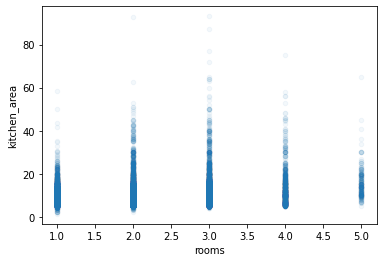

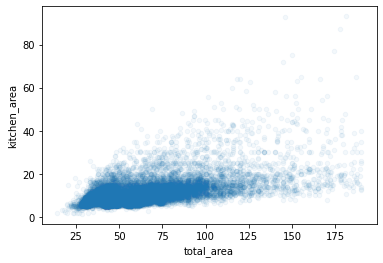

In [40]:
df.plot(x='rooms', y='kitchen_area', kind='scatter', alpha=0.05);
df.plot(x='total_area', y='kitchen_area', kind='scatter', alpha=0.05);
print('Корреляция между количеством комнат и площадью кухни составляет', 
      df['rooms'].corr(df['kitchen_area']))
print('Корреляция между общей площадью и площадью кухни составляет', 
      df['total_area'].corr(df['kitchen_area']))

Корреляция с общей площадью недостаточно объясняет площадь кухни, поэтому мы не сможем использовать линейную регрессию (она генерирует слишком много выбросов). В студиях и квартирах с общей планировкой поставим 0 (так как там нет выделенной кухни).

In [41]:
print('Количество NaN в столбце kitchen_area:', df['kitchen_area'].isnull().sum())

print(df.query('kitchen_area.isna() and studio == True and open_plan == True')['kitchen_area'].count())
print(df.query('kitchen_area.isna() and (studio == True or open_plan == True)')['kitchen_area'].count())

Количество NaN в столбце kitchen_area: 2191
0
0


In [42]:
df.loc[(df['kitchen_area'].isnull() & ((df['studio'] == True) | (df['open_plan'] == True))), 'kitchen_area'] = 0
print('Количество NaN в столбце kitchen_area:', df['kitchen_area'].isnull().sum())
df['kitchen_area'] = df['kitchen_area'].fillna(-1)
print('Количество NaN в столбце kitchen_area:', df['kitchen_area'].isnull().sum())

Количество NaN в столбце kitchen_area: 1979
Количество NaN в столбце kitchen_area: 0


##### balcony
В строках без значения вставим 0 

In [43]:
df['balcony'] = df['balcony'].fillna(0)
print('Количество NaN в столбце balcony:', df['balcony'].isnull().sum())

Количество NaN в столбце balcony: 0


##### locality_name
Удалим пропуски

In [44]:
df = df.dropna(subset=['locality_name'])
print('Количество NaN в столбце locality_name:', df['locality_name'].isnull().sum())

Количество NaN в столбце locality_name: 0


In [45]:
print('Количество уникальных значений:', df['locality_name'].nunique())
df['locality_name'].unique()

Количество уникальных значений: 363


array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Удалим из названия тип поселения и приведём его к нижнему регистру, заменим буквы "ё" на буквы "е"

In [46]:
#поскольку моя цель - записать данные в исходный датафрейм, отключаем следующее предупреждение
#пояснение - https://stackoverflow.com/questions/20625582/how-to-deal-with-settingwithcopywarning-in-pandas
pd.options.mode.chained_assignment = None
df['locality_name'] = df['locality_name'].str.lower()
df['locality_name'] = df['locality_name'].str.replace('ё', 'е')

replace_dict = ['поселок ', 'городского типа ', 'городской ',  'деревня ', 
                'коттеджный ', 'село ', 'посёлок ', 'при железнодорожной станции ',
                'станции ', 'садоводческое некоммерческое товарищество ', 'садовое товарищество ']

for value in replace_dict:
    df['locality_name'] = df['locality_name'].str.replace(value, '')
    
print('Количество уникальных значений:', df['locality_name'].nunique())
df['locality_name'].unique()

Количество уникальных значений: 304


array(['санкт-петербург', 'шушары', 'янино-1', 'парголово', 'мурино',
       'ломоносов', 'сертолово', 'петергоф', 'пушкин', 'кудрово',
       'коммунар', 'колпино', 'красный бор', 'гатчина', 'федоровское',
       'выборг', 'кронштадт', 'кировск', 'новое девяткино',
       'металлострой', 'лебяжье', 'сиверский', 'молодцово',
       'кузьмоловский', 'новая ропша', 'павловск', 'пикколово',
       'всеволожск', 'волхов', 'кингисепп', 'приозерск', 'сестрорецк',
       'куттузи', 'аннино', 'ефимовский', 'плодовое', 'заклинье',
       'торковичи', 'первомайское', 'красное село', 'понтонный',
       'сясьстрой', 'старая', 'лесколово', 'новый свет', 'сланцы',
       'путилово', 'ивангород', 'шлиссельбург', 'никольское',
       'зеленогорск', 'сосновый бор', 'оржицы', 'кальтино', 'романовка',
       'бугры', 'рощино', 'кириши', 'луга', 'волосово', 'отрадное',
       'павлово', 'оредеж', 'копорье', 'молодежное', 'тихвин', 'победа',
       'нурма', 'синявино', 'тосно', 'стрельна', 'бокситогорск',

##### airports_nearest
Поскольку неизвестные города в датафрейме отсутствуют, заполним пропуски медианой, сгруппированной по населённому пункту (Санкт-Петербург большой, его мы достоверно заполнить не сможем).

In [47]:
print('Количество NaN в столбце airports_nearest:', df['airports_nearest'].isnull().sum())
df.loc[df['locality_name'] != 'санкт-петербург', 'airports_nearest'] = fillna_with_group_median(
    df[df['locality_name'] != 'санкт-петербург'], 'airports_nearest', 'locality_name'
    )['airports_nearest'].values
df['airports_nearest'].fillna(-1, inplace=True)

Количество NaN в столбце airports_nearest: 5514
Количество NaN в столбце airports_nearest: 5428


##### city_centers_nearest
Заполним пропуски медианой, сгруппированной по населённому пункту (Санкт-Петербург большой, его мы достоверно заполнить не сможем)

In [48]:
print('Количество NaN в столбце city_centers_nearest:', df['city_centers_nearest'].isnull().sum())
df[df['locality_name'] != 'санкт-петербург']['city_centers_nearest'] = fillna_with_group_median(
    df[df['locality_name'] != 'санкт-петербург'], 'city_centers_nearest', 'locality_name'
    )['city_centers_nearest'].values
df['city_centers_nearest'].fillna(-1, inplace=True)

Количество NaN в столбце city_centers_nearest: 5494
Количество NaN в столбце city_centers_nearest: 5428


##### parks_nearest
Поскольку расстояние до парка не коррелирует с расстоянием до центра города, заполним пропуски медианой, сгруппированной по городам (locality_name).

Корреляция между расстоянием до центра города и расстоянием до парка в Санкт-Петербурге составляет 0.03855103671461541
Корреляция между расстоянием до центра города и расстоянием до парка в области составляет -0.07237200080549419


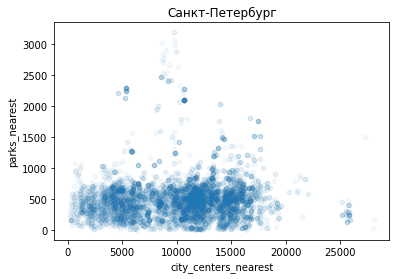

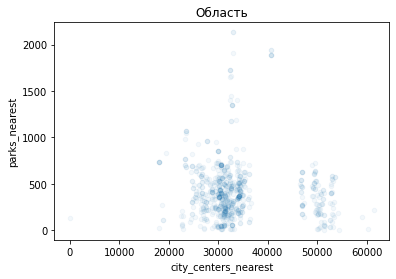

In [49]:
df[df['locality_name'] == 'санкт-петербург'].plot(
    x='city_centers_nearest', y='parks_nearest', kind='scatter', alpha=0.05, title='Санкт-Петербург');
df[df['locality_name'] != 'санкт-петербург'].plot(
    x='city_centers_nearest', y='parks_nearest', kind='scatter', alpha=0.05, title='Область');

print('Корреляция между расстоянием до центра города и расстоянием до парка в Санкт-Петербурге составляет', 
    df[df['locality_name'] == 'санкт-петербург']['city_centers_nearest']
    .corr(df[df['locality_name'] == 'санкт-петербург']['parks_nearest']))
print('Корреляция между расстоянием до центра города и расстоянием до парка в области составляет', 
    df[df['locality_name'] != 'санкт-петербург']['city_centers_nearest']
    .corr(df[df['locality_name'] != 'санкт-петербург']['parks_nearest']))

In [50]:
print('Количество NaN в столбце parks_nearest:', df['parks_nearest'].isnull().sum())
df = fillna_with_group_median(df, 'parks_nearest', 'locality_name')
df = fillna_with_median(df, 'parks_nearest')
df['parks_nearest'].fillna(-1, inplace=True)

Количество NaN в столбце parks_nearest: 15419
Количество NaN в столбце parks_nearest: 5982
Количество NaN в столбце parks_nearest: 0


##### parks_around_3000
Незаполнение этого критерия может означать 0, но поскольку он заполняется автоматически, заполним пропуски медианой, сгруппированной по населённому пункту. Оставшиеся пропуски заполним общей медианой.

In [51]:
print('Количество NaN в столбце parks_around_3000:', df['parks_around_3000'].isnull().sum())
df[df['parks_nearest'] <= 3000] = fillna_with_group_median(df[df['parks_nearest'] <= 3000], 'parks_around_3000', 'locality_name')
df[df['parks_nearest'] <= 3000] = fillna_with_median(df[df['parks_nearest'] <= 3000], 'parks_around_3000')
df['parks_around_3000'].fillna(-1, inplace=True)

Количество NaN в столбце parks_around_3000: 5493
Количество NaN в столбце parks_around_3000: 5428
Количество NaN в столбце parks_around_3000: 0


##### ponds_nearest
Поскольку расстояние до водоёма не коррелирует с расстоянием до центра города, заполним пропуски медианой, сгруппированной по городам (locality_name). Оставшиеся пропуски заполним общей медианой.

Корреляция между расстоянием до центра города и расстоянием до парка в Санкт-Петербурге составляет 0.11636083309332436
Корреляция между расстоянием до центра города и расстоянием до парка в области составляет -0.16391877121488965


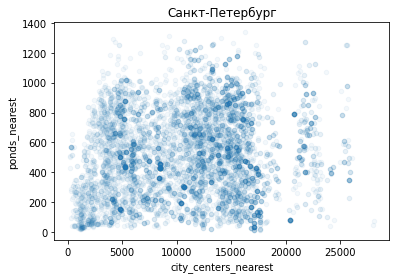

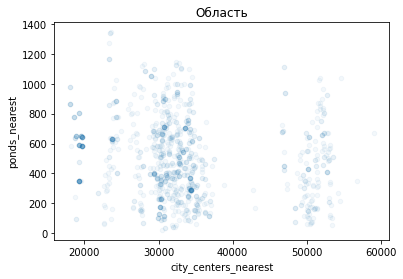

In [52]:
df[df['locality_name'] == 'санкт-петербург'].plot(
    x='city_centers_nearest', y='ponds_nearest', kind='scatter', alpha=0.05, title='Санкт-Петербург');
df[df['locality_name'] != 'санкт-петербург'].plot(
    x='city_centers_nearest', y='ponds_nearest', kind='scatter', alpha=0.05, title='Область');

print('Корреляция между расстоянием до центра города и расстоянием до парка в Санкт-Петербурге составляет', 
    df[df['locality_name'] == 'санкт-петербург']['city_centers_nearest']
    .corr(df[df['locality_name'] == 'санкт-петербург']['ponds_nearest']))
print('Корреляция между расстоянием до центра города и расстоянием до парка в области составляет', 
    df[df['locality_name'] != 'санкт-петербург']['city_centers_nearest']
    .corr(df[df['locality_name'] != 'санкт-петербург']['ponds_nearest']))

In [53]:
print('Количество NaN в столбце ponds_nearest:', df['ponds_nearest'].isnull().sum())
df = fillna_with_group_median(df, 'ponds_nearest', 'ponds_around_3000')
df['ponds_nearest'].fillna(-1, inplace=True)

Количество NaN в столбце ponds_nearest: 14424
Количество NaN в столбце ponds_nearest: 14424


##### ponds_around_3000
Незаполнение этого критерия может означать 0, но поскольку он заполняется автоматически, заполним пропуски медианой, сгруппированной по населённому пункту. Оставшиеся пропуски заполним общей медианой.

In [54]:
print('Количество NaN в столбце ponds_around_3000:', df['ponds_around_3000'].isnull().sum())
df[df['ponds_around_3000'] <= 3000] = fillna_with_group_median(df[df['ponds_around_3000'] <= 3000], 'ponds_around_3000', 'locality_name')
df[df['ponds_around_3000'] <= 3000] = fillna_with_median(df[df['ponds_around_3000'] <= 3000], 'ponds_around_3000')
df['ponds_around_3000'].fillna(-1, inplace=True)

Количество NaN в столбце ponds_around_3000: 5493
Количество NaN в столбце ponds_around_3000: 0
Количество NaN в столбце ponds_around_3000: 0


##### days_exposition
Поскольку чем ближе дата к дате выгрузки, тем больше пропусков, скорее всего это нераспроданные объявления. Заполнение поля исказит данные.

Количество NaN в столбце days_exposition: 3088


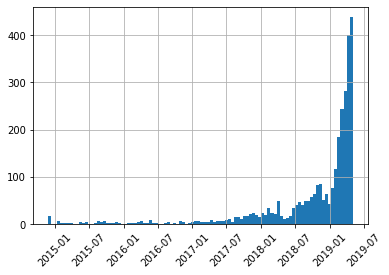

In [55]:
print('Количество NaN в столбце days_exposition:', df['days_exposition'].isnull().sum())
df.query('days_exposition.isna()')['first_day_exposition'].hist(bins=100, xrot=45);
df['days_exposition'].fillna(-1, inplace=True)

#### Заменим формат

In [56]:
df.isna().sum()

total_images            0
last_price              0
total_area              0
first_day_exposition    0
rooms                   0
ceiling_height          0
floors_total            0
living_area             0
floor                   0
is_apartment            0
studio                  0
open_plan               0
kitchen_area            0
balcony                 0
locality_name           0
airports_nearest        0
city_centers_nearest    0
parks_around_3000       0
parks_nearest           0
ponds_around_3000       0
ponds_nearest           0
days_exposition         0
dtype: int64

In [57]:
df_format = ['last_price', 'floors_total', 'balcony', 
             'parks_around_3000', 'parks_nearest', 'ponds_around_3000', 
            'ponds_nearest', 'airports_nearest', 'city_centers_nearest', 'days_exposition']

df[df_format] = df[df_format].astype('int')
df['is_apartment'] = df['is_apartment'].astype('bool')
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

#### Вывод
Данные удалось очистить и преобразовать, с ними можно работать

### Добавление новых столбцов

#### Добавление цены квадратного метра

In [58]:
df['price_sq_meter']=df['last_price'] / df['total_area']

#### Добавление дня недели, месяца и года публикации объявления

In [59]:
#день недели
df['weekday_exposition'] = df['first_day_exposition'].dt.weekday

#месяц 
df['month_exposition'] = df['first_day_exposition'].dt.month

#год
df['year_exposition'] = df['first_day_exposition'].dt.year

#### Добавление этажа квартиры (первый, последний и другой)

In [60]:
def floors_category(row):
    if row['floor'] == 1:
        return 'первый' 
    elif row['floor'] == row['floors_total']:
        return 'последний' 
    else: return 'другой'
    
df['floor_group'] = df.apply(floors_category, axis=1)

#### Добавление расстояния до центра города в км

In [61]:
df['city_centers_nearest_km'] = df['city_centers_nearest'] / 1000

In [62]:
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition', 'price_sq_meter',
       'weekday_exposition', 'month_exposition', 'year_exposition',
       'floor_group', 'city_centers_nearest_km'],
      dtype='object')

In [63]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_sq_meter,weekday_exposition,month_exposition,year_exposition,floor_group,city_centers_nearest_km
0,20,13000000,108.0,2019-03-07,3,2.70,16,54,8,False,...,482,2,755,-1,120370.370370,3,3,2019,другой,16.028
1,7,3350000,40.4,2018-12-04,1,2.65,11,18,1,False,...,463,0,-1,81,82920.792079,1,12,2018,первый,18.603
2,10,5196000,56.0,2015-08-20,2,2.65,5,36,4,False,...,90,2,574,558,92785.714286,3,8,2015,другой,13.933
3,0,64900000,159.0,2015-07-24,3,2.65,14,54,9,False,...,84,3,234,424,408176.100629,4,7,2015,другой,6.800
4,2,10000000,100.0,2018-06-19,2,3.03,14,36,13,False,...,112,1,48,121,100000.000000,1,6,2018,другой,8.098


#### Вывод
В данные добавлены новые столбцы, которые дополняют понимание данных. Добавлены значения цены за 1 кв.м., дня недели, месяца и года объявления, категории этажа, соотношения жилой площади и площади кухни к общей.

### Проведите исследовательский анализ данных

#### Изучение параметров

##### Общая площадь

count    23229.000000
mean        57.681612
std         25.544053
min         12.000000
25%         40.000000
50%         51.400000
75%         68.200000
max        190.000000
Name: total_area, dtype: float64

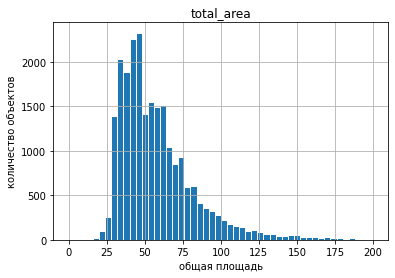

In [64]:
df.hist('total_area', bins=50, range=(0, 200), ec='white');
plt.xlabel('общая площадь')
plt.ylabel('количество объектов')
df['total_area'].describe()

Основная часть объектов имеет площадь между 25 и 50 квадратными метрами. Медианная площадь (51) близка к средней (57), что говорит нам о том, что слишком больших выбросов нет (мы их удалили заранее). 

##### Жилая площадь

count    23229.000000
mean        36.409919
std         17.085181
min          0.000000
25%         18.000000
50%         36.000000
75%         54.000000
max         90.000000
Name: living_area, dtype: float64

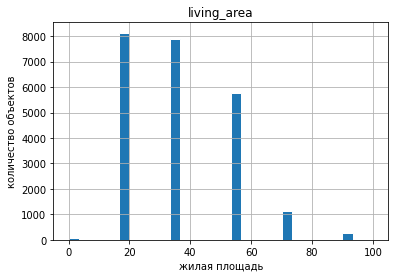

In [65]:
df.hist('living_area', bins=30, range=(0, 100), ec='white');
plt.xlabel('жилая площадь')
plt.ylabel('количество объектов')
df['living_area'].describe()

Жилая площадь повторяет наши предыдущие выводы, среднее значение равно медианному (36).

Интервалы выглядят обрывочно из-за выбранного способа заполнения (средняя площадь комнаты на число комнат)

##### Площадь кухни

count    21259.000000
mean        10.245195
std          5.412199
min          0.000000
25%          7.000000
50%          9.000000
75%         11.800000
max         93.200000
Name: kitchen_area, dtype: float64

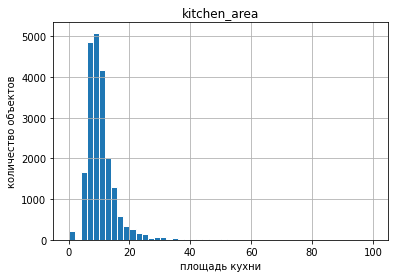

In [66]:
df[df['kitchen_area']>=0].hist('kitchen_area', bins=50, range=(0, 100), ec='white');
plt.xlabel('площадь кухни')
plt.ylabel('количество объектов')
df[df['kitchen_area']>=0]['kitchen_area'].describe()

В площади кухни среднее (10) тоже близко к медиане (9), 75% кухонь меньше 12 квадратных метров, но среди остальных 25% максимальное значение это 93 квадратных метра. Похоже, что это кухни в другом сегменте жилья.

##### Цена объекта

count    23229.000000
mean         5.965908
std          6.162060
min          0.430000
25%          3.400000
50%          4.600000
75%          6.649000
max        330.000000
Name: last_price, dtype: float64

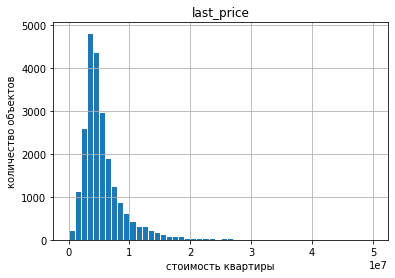

In [67]:
df.hist('last_price', bins=50, range = (0, 50000000), ec='white');
plt.xlabel('стоимость квартиры')
plt.ylabel('количество объектов')
#представим цену в миллионах для наглядности
(df['last_price']/1000000).describe()

Для цены объекта среднее выше медианы, это говорит нам о том, что выбросы здесь сильнее отличаются от "стандартных" объектов. Действительно, интерквартильный размах здесь всего 3,2 млн рублей, но разница между третьим квартилем и максимальным значением уже 324 миллиона. Есть относительно небольшое число объектов, которые намного дороже среднего. Скорее всего это более премиальный сегмент.

##### Количество комнат

count    23229.000000
mean         2.022773
std          0.949177
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          5.000000
Name: rooms, dtype: float64

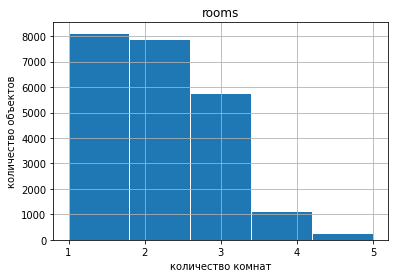

In [68]:
df.hist('rooms', bins=5, range = (1, 5), ec='white');
plt.xlabel('количество комнат')
plt.ylabel('количество объектов')
x_ticks = range(1, 6)
plt.xticks(x_ticks)
df['rooms'].describe()

Поскольку мы удалили объекты с количеством комнат больше 5, здесь воспроизвелась ожидаемая картина - чем больше комнат у объекта, тем меньше таких объектов.

##### Высота потолков

count    23229.000000
mean         2.688483
std          0.196285
min          2.000000
25%          2.600000
50%          2.650000
75%          2.700000
max          4.000000
Name: ceiling_height, dtype: float64

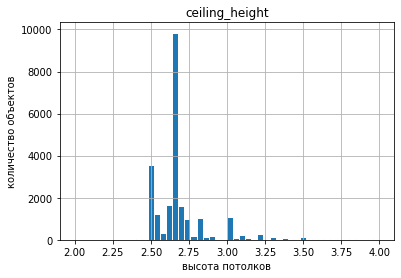

In [69]:
df.hist('ceiling_height', bins=50, range = (2, 4), ec='white');
plt.xlabel('высота потолков')
plt.ylabel('количество объектов')
df['ceiling_height'].describe()

Максимальное значение потолков (4 метра) не выглядит неправдоподобно, разница между максимальным и минимальным значением всего 2 метра. Медианное значение равно 2,65 метрам, и 75% объектов имеют высоту потолков до 2,7 метров. Ничего необычного.

##### Этаж квартиры

count    23229.000000
mean         5.893926
std          4.880043
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

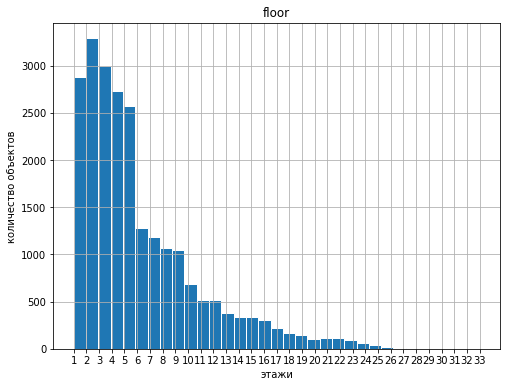

In [70]:
df.hist('floor', bins=33, range=(1, 33),ec='white', figsize=(8,6));
plt.xlabel('этажи')
plt.ylabel('количество объектов')
x_ticks = range(1, 34)
plt.xticks(x_ticks)
df['floor'].describe()

Чаще всего продают объекты на втором и третьем этаже, виден резкий спад после 5, 9 и 12 этажей (объясняется СНиП, но об этом подробнее в общей этажности).

##### Тип этажа квартиры

count      23229
unique         3
top       другой
freq       17113
Name: floor_group, dtype: object

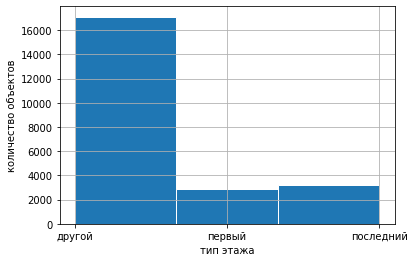

In [71]:
df['floor_group'].hist(bins=3, ec='white');
plt.xlabel('тип этажа')
plt.ylabel('количество объектов')
df['floor_group'].describe()

В основном продают объекты между первым и последним этажами, но объектов на последнем этаже больше

##### Общее количество этажей в доме

count    23229.000000
mean        10.726893
std          6.585254
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         35.000000
Name: floors_total, dtype: float64

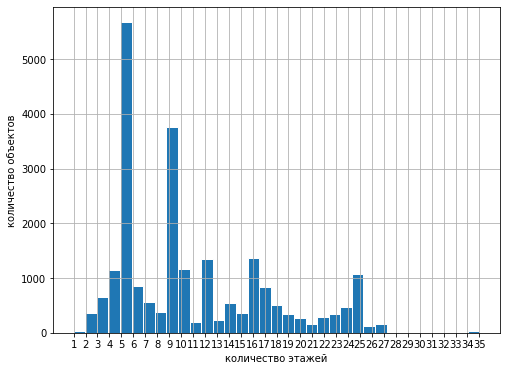

In [72]:
df['floors_total'].hist(bins=35, range=(1, 35), ec='white', figsize=(8,6));
plt.xlabel('количество этажей')
plt.ylabel('количество объектов')
x_ticks = range(1, 36)
plt.xticks(x_ticks)
df['floors_total'].describe()

Среди значений выделяются явные пики. Изучим их:

In [73]:
(df['floors_total'].value_counts()
 .sort_values(ascending=False)
 .head(10))

5     5672
9     3750
16    1369
12    1355
10    1168
4     1150
25    1074
6      846
17     828
3      646
Name: floors_total, dtype: int64

В наборе данных больше всего 5-этажных, 9-этажных, 12-этажных и 16-тиэтажных объектов.

Дело в том, что согласно СНиП здания выше 5 этажей (или 4, в зависимости от высоты потолков) необходимо оборудовать как минимум одним лифтом; здания выше 9 этажей нужно оборудовать как минимум двумя лифтами. Кроме того, здания выше 28 метров нужно было оборудовать дополнительными системами пожаротушения из-за того, что пожарные не могли добраться до такой высоты. Кроме того, на этажи выше пятого по старым СНиП (СНиП 2.08.01-89 «Жилые здания») нельзя было заводить газовые трубы снаружи, а выше девятого этажа нельзя было ставить газовые плиты.

У зданий выше 12 этажей меньше поэтажная площадь квартир, приходящаяся на 1 лифт, поэтому застройщику придётся либо уменьшать площадь квартир, либо оснащать здание третьим лифтом. В зданиях выше 16 этажей требуется более скоростной лифт.

Источник: https://terraingis.ru/snip-zdanija-zhilye-mnogokvartirnye.html#Par762

##### Расстояние до центра города в метрах

count    23229.000000
mean     10936.593870
std       9659.556414
min         -1.000000
25%       2110.000000
50%      11343.000000
75%      15282.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

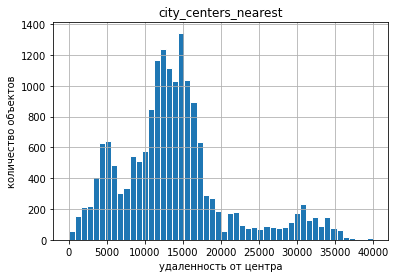

In [74]:
df.hist('city_centers_nearest', bins=50, range = (0, 40000), ec='white');
plt.xlabel('удаленность от центра')
plt.ylabel('количество объектов')
df['city_centers_nearest'].describe()

В среднем объекты находятся в 10 километрах от центра, медиана чуть выше среднего, потому что нет явных выбросов. Объектов ближе чем 2 км от центра, всего 25%. Однако, и объектов дальше, чем 15 км от центра, тоже всего около 25%. То есть основная часть объектов располагается между 10 и 15 км от центра.

##### Расстояние до ближайшего аэропорта

count    17723.000000
mean     28850.126784
std      12699.368655
min          0.000000
25%      18488.000000
50%      26902.000000
75%      37407.000000
max      84869.000000
Name: airports_nearest, dtype: float64

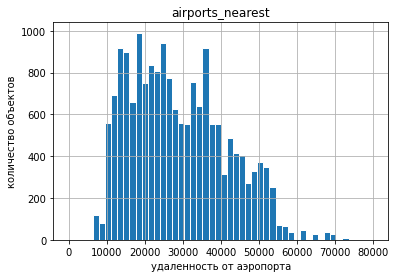

In [75]:
df[df['airports_nearest']>=0].hist(
    'airports_nearest', bins=50, range = (0, 80000), ec='white');
plt.xlabel('удаленность от аэропорта')
plt.ylabel('количество объектов')
df[df['airports_nearest']>=0]['airports_nearest'].describe()

В расстоянии до аэропорта есть больше выбросов, потому что медиана (27 км) чуть меньше среднего (29 км). В основном объекты находятся на расстоянии от 18 до 37 км от аэропорта (интерквартильный размах), то есть чуть дальше, чем от центра города.

##### Расстояние до ближайшего парка

count    23229.000000
mean       474.107753
std        202.777553
min          1.000000
25%        463.000000
50%        463.000000
75%        463.000000
max       3190.000000
Name: parks_nearest, dtype: float64

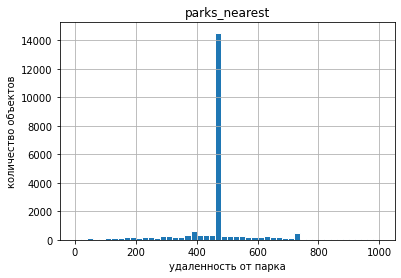

In [76]:
df.hist('parks_nearest', bins=50, range = (0, 1000), ec='white');
plt.xlabel('удаленность от парка')
plt.ylabel('количество объектов')
df['parks_nearest'].describe()

Выделяется медианное значение, которым мы заполняли пропуски. Максимальная удалённость от парка - 3200 метров, а у 75% объектов парк находится менее, чем в 500 метрах от дома. Следовательно, в Санкт-Петербурге и области для большинства покупателей объектов недвижимости из нашего набора данных парк будет находиться в пешей доступности.

##### День и месяц публикации объявления

count    23229.000000
mean         2.566318
std          1.789955
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: weekday_exposition, dtype: float64

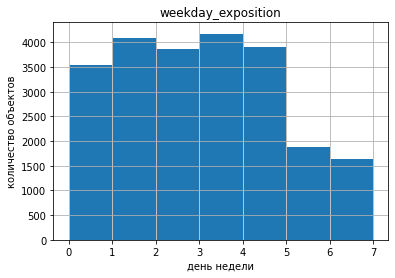

In [77]:
df.hist('weekday_exposition', bins=7, range = (0, 7), ec='white');
plt.xlabel('день недели')
plt.ylabel('количество объектов')
df['weekday_exposition'].describe()

В основном объявления публиковались в рабочие дни, видимо, создатели объявлений в выходные предпочитают не заниматься продажей недвижимости. Возможно, это может говорить о значительной доле объявлений от агентств и риэлторов, но для того, чтобы это утверждать, не хватает данных.

count    23229.000000
mean         6.403978
std          3.492847
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month_exposition, dtype: float64

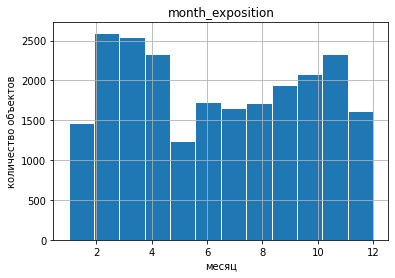

In [78]:
df.hist('month_exposition', bins=12, range = (1, 12), ec='white');
plt.xlabel('месяц')
plt.ylabel('количество объектов')
df['month_exposition'].describe()

В мае, январе и декабре публикуется меньше всего объявлений. Это связано с количеством выходных в мае и январе, а в декабре у создателей объявлений видимо другие приоритеты. Летом тоже публикуется меньше объявлений, чем в другие времена года, скорее всего, это вызвано сезоном отпусков.

#### Как быстро продавались квартиры?

count    20141.000000
mean       179.234000
std        218.057669
min          1.000000
25%         45.000000
50%         94.000000
75%        229.000000
max       1580.000000
Name: days_exposition, dtype: float64

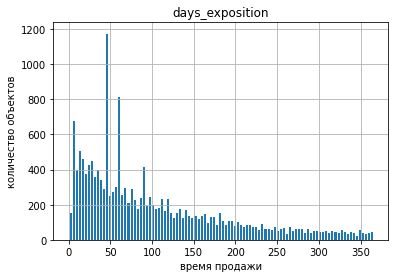

In [79]:
df.hist('days_exposition', bins=100, range = (0, 365), ec='white');
plt.xlabel('время продажи')
plt.ylabel('количество объектов')
df[df['days_exposition']>=0]['days_exposition'].describe()

Изучим пиковые значения:

In [80]:
(df['days_exposition'].value_counts()
 .sort_values(ascending=False)
 .head(10))

-1     3088
 45     878
 60     537
 7      233
 30     206
 90     186
 4      174
 3      157
 5      151
 14     143
Name: days_exposition, dtype: int64

In [81]:
(df.query('days_exposition <= 365 and days_exposition >= 0')
 ['days_exposition'].count()
 /df[df['days_exposition']>=0]['days_exposition'].count())

0.8536318951392682

**Вывод**
- Среднее время закрытия объявления - 179 дней, медианное -  94 дня
- Основная часть объявлений (85%) закрываются в первый год
- Есть пики закрытия объявлений (45, 60, 30 и 90 дней). То, что значения круглые, наталкивает на мысль, что это автоматическое снятие объявлений с публикации (как на Авито)

Для того, чтобы определить, была ли продажа быстрой или медленной, возьмём интерквартильный размах: продажи в нём мы будем считать нормальными, продажи до 25-го процентиля (45 дней) быстрыми, а продажи после 75-го процентиля (229 дней) медленными

#### Какие факторы больше всего влияют на общую (полную) стоимость объекта?

Поскольку параметров много, лучше построить корреляционную матрицу и визуализировать её в виде heatmap - так сравнение коэффициентов корреляции между собой будет нагляднее, к тому же, мы сможем увидеть, какие факторы скоррелированы друг с другом

Так как тип этажа не является числовой переменной, его мы временно преобразуем в числовой формат

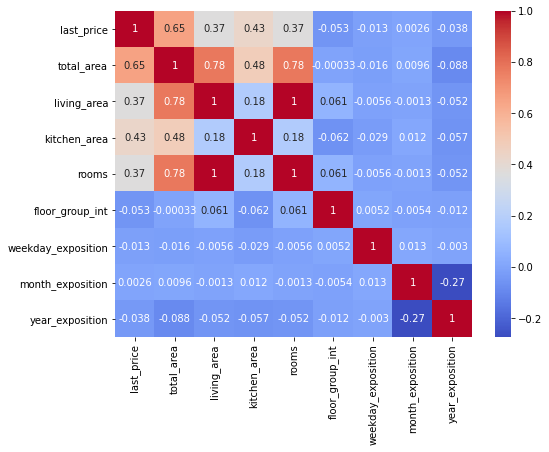

In [82]:
df['floor_group_int'] = df['floor_group'].replace({'другой': 0, 'первый': 1, 'последний': 2})

corr_matrix = df[[
    'last_price',
    'total_area',
    'living_area',
    'kitchen_area',
    'rooms',
    'floor_group_int',
    'weekday_exposition',
    'month_exposition',
    'year_exposition'
]].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

plt.show()

df.drop('floor_group_int', axis=1, inplace=True)

**Вывод**

Нас интересует в первую очередь первая строка (или первый столбец) корреляционной матрицы. По нему мы определяем коэффициент корреляции факторов с ценой.

Общая площадь коррелирует с ценой сильнее всего (k=0,65), на втором месте жилая площадь и количество комнат (k=0,37 у обоих факторов). Однако они не могут быть использованы для построения предиктивных моделей вместе с общей площадью, так как они коррелируют друг с другом с k=1 (из-за особенностей заполнения жилой площади) и с общей площадью с k=0,78 (в модели это вызовет мультиколлинеарность). Остальные факторы коррелируют с ценой незначительно.

#### Цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`.

In [83]:
df_price_sq_meter = df.pivot_table(
    index='locality_name', values='price_sq_meter', aggfunc=['count', 'mean'])
df_price_sq_meter.columns = ['count', 'mean']
df_price_sq_meter = df_price_sq_meter.sort_values('count', ascending=False)
df_top_10 = df_price_sq_meter.head(10)
df_top_10

,count,mean
locality_name,,
санкт-петербург,15336,113556.564038
мурино,586,86041.116064
кудрово,470,95260.846171
шушары,439,78551.344545
всеволожск,398,68654.473986
пушкин,363,103213.468857
колпино,337,75333.295801
парголово,326,90332.263023
гатчина,307,68746.146763


In [84]:
print(df_price_sq_meter[df_price_sq_meter['mean'] == df_price_sq_meter['mean'].max()])
print(df_price_sq_meter[df_price_sq_meter['mean'] == df_price_sq_meter['mean'].min()])

               count           mean
locality_name                      
зеленогорск       24  115122.799198
               count          mean
locality_name                     
старополье         3  11206.221198


In [85]:
print(df_top_10.head(1))
print(df_top_10.tail(1))

                 count           mean
locality_name                        
санкт-петербург  15336  113556.564038
               count          mean
locality_name                     
выборг           237  58141.909153


**Вывод**

Самая высокая цена квадратного метра в Санкт-Петербурге (115123 руб.), самая низкая - в Старополье (11206 руб.). Цены отличаются более, чем в 10 раз.

Среди топ-10  населённых пунктов с самой высокой ценой 1 квадратного метра самая низкая цена в Выборге (58142 руб.), и она отличается от цены в Санкт-Петербурге почти в 2 раза. При этом цена выше, чем в Старополье, в 5 раз.

#### Средняя цена одного километра в Санкт-Петербурге

Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."

Корреляция между расстоянием до центра города и ценой в Санкт-Петербурге составляет -0.3197227986815362


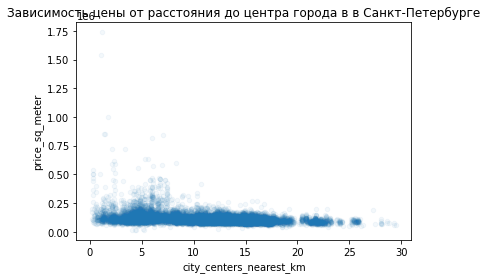

In [86]:
df_price_km_spb = (df.query('locality_name == "санкт-петербург" and city_centers_nearest_km >= 0')
    [['city_centers_nearest_km', 'price_sq_meter']])

df_price_km_spb.plot(
    x='city_centers_nearest_km',
    y='price_sq_meter',
    kind='scatter',
    alpha=0.05,
    title='Зависимость цены от расстояния до центра города в в Санкт-Петербурге'
);

print('Корреляция между расстоянием до центра города и ценой в Санкт-Петербурге составляет', 
    df_price_km_spb['city_centers_nearest_km']
    .corr(df_price_km_spb['price_sq_meter']))

In [87]:
# Найдём стоимость каждого километра
df_price_km_spb['city_centers_nearest_km'] = df_price_km_spb['city_centers_nearest_km'].round()
df_grouped = df_price_km_spb.groupby('city_centers_nearest_km')['price_sq_meter'].median().reset_index()
df_grouped = df_grouped.sort_values('city_centers_nearest_km')
df_grouped['price_sq_meter_diff'] = df_grouped['price_sq_meter'] - df_grouped['price_sq_meter'].shift(1)
df_grouped = df_grouped.fillna(0).astype('int')
df_grouped

,city_centers_nearest_km,price_sq_meter,price_sq_meter_diff
0,0,150243,0
1,1,126618,-23625
2,2,123675,-2942
3,3,109878,-13797
4,4,118055,8177
5,5,127367,9311
6,6,130000,2632
7,7,126063,-3936
8,8,122532,-3531
9,9,105813,-16718


**Вывод**

Наблюдается умеренная отрицательная корреляция (k=-0,31) между расстоянием до центра города и ценой в Санкт-Петербурге. Расстояние влияет на цену, но не является определяющим фактором цены.

Если попробовать посчитать стоимость удаления от центра (`price_sq_meter_diff`), то можно заметить, что хотя по мере удаления от центра цена на квадратный метр падает, это не всегда так: например, если удаляться от центра не на 3, а на 4, 5, 6 или 7 километров, то цена на квадратный метр будет расти. Возможно, что это связано с тем, в какое время застраивались районы на этом расстоянии (дальше от исторического центра квартиры могут быть новее) или с расстоянием до метро.

### Общий вывод

Предоставленные данные были очищены от выбросов с незначительными потерями, типы данных были изменены, пропуски заполнены, были обработали неявные дубликаты в населенных пунктах. Это позволило нам сделать точные выводы о влиянии ряда факторов на цену объектов недвижимости.

Были изучены факторы, которые влияют на стоимость объектов недвижимости:
- Самая высокая цена квадратного метра в Санкт-Петербурге (115123 руб.), самая низкая - в Старополье (11206 руб.). Цены отличаются более, чем в 10 раз.
- Наибольшее влияние оказывает общая площадь квартиры, сильная положительная корреляция 0.65. Это означает, что чем больше площадь, тем выше цена.
- Жилая площадь также сильно влияет на цену, как и количество комнат, но эти факторы скоррелированы между собой и их нельзя использовать в моделях.
- Дата размещения объявления не оказывает влияния на цену. Мы проанализировали день, месяц и год размещения объявлений, но не обнаружили значимой корреляции.
- Была обнаружена зависимость между стоимостью и удаленностью от центра города. Однако она не является определяющим фактором, к тому же, средняя цена квадратного метра не всегда прирастает по мере приближения к центру.
- Не было обнаружено значительной корреляции цены с другими факторами.

Кроме того, было изучено среднее время продажи объектов недвижимости:
- Среднее время закрытия объявления - 179 дней, медианное -  94 дня, 85% объявлений закрываются в первый год после публикации.
- Есть пики закрытия объявлений (45, 60, 30 и 90 дней). То, что значения круглые, наталкивает на мысль, что это автоматическое снятие объявлений с публикации (как на Авито)
- Предлагается считать продажи до 25-го процентиля (45 дней) быстрыми, а продажи после 75-го процентиля (229 дней) медленными